In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
import scipy.ndimage
import skimage.filters
import sklearn.metrics

In [2]:
plt.ion()

(-0.5, 2591.5, 1727.5, -0.5)

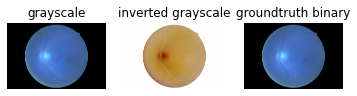

In [5]:
grayscale = cv2.imread('cataract_001.png')
grayscale = 255 - grayscale
groundtruth = cv2.imread('cataract_001.png')
plt.subplot(1, 3, 1)
plt.imshow(255 - grayscale, cmap='gray')
plt.title('grayscale')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(grayscale, cmap='gray')
plt.title('inverted grayscale')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(groundtruth, cmap='gray')
plt.title('groundtruth binary')
plt.axis('off')

Text(0.5, 1.0, 'median filtered image')

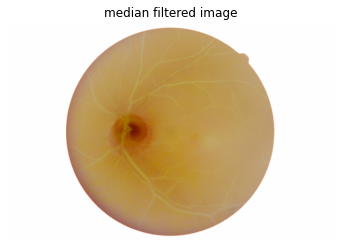

In [6]:
median_filtered = scipy.ndimage.median_filter(grayscale, size=3)
plt.imshow(median_filtered, cmap='gray')
plt.axis('off')
plt.title('median filtered image')

Text(0, 0.5, 'Count')

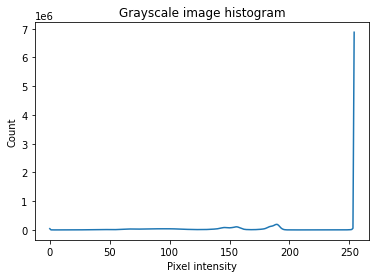

In [7]:
counts, vals = np.histogram(grayscale, bins=range(2 ** 8))
plt.plot(range(0, (2 ** 8) - 1), counts)
plt.title('Grayscale image histogram')
plt.xlabel('Pixel intensity')
plt.ylabel('Count')


Threshold value is 146


Text(0.5, 1.0, 'otsu predicted binary image')

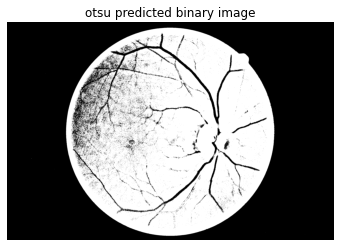

In [23]:
img = cv2.imread('cataract_004.png')
img_t = cv2.addWeighted(img,4, cv2.GaussianBlur(img , (0,0),30) ,-4 ,128)
median_filtered = cv2.cvtColor(img_t, cv2.COLOR_BGR2GRAY)
threshold = skimage.filters.threshold_otsu(median_filtered)
print('Threshold value is {}'.format(threshold))
predicted = np.uint8(median_filtered > threshold) * 255
plt.imshow(predicted, cmap='gray')
plt.axis('off')
plt.title('otsu predicted binary image')